In [1]:
#Yash Gharate
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
heart = pd.read_csv("Heart.csv")

In [3]:
heart.head()

,Unnamed: 0,Age,Sex,ChestPain,RestBP,Chol,Fbs,RestECG,MaxHR,ExAng,Oldpeak,Slope,Ca,Thal,AHD
0,1,63,1,typical,145,233,1,2,150,0,2.3,3,0.0,fixed,No
1,2,67,1,asymptomatic,160,286,0,2,108,1,1.5,2,3.0,normal,Yes
2,3,67,1,asymptomatic,120,229,0,2,129,1,2.6,2,2.0,reversable,Yes
3,4,37,1,nonanginal,130,250,0,0,187,0,3.5,3,0.0,normal,No
4,5,41,0,nontypical,130,204,0,2,172,0,1.4,1,0.0,normal,No


In [4]:
heart.shape

(303, 15)

In [5]:
heart.duplicated().sum()

0

In [6]:
heart.drop_duplicates(inplace=True)
heart.shape

(303, 15)

In [7]:
new_cp=pd.get_dummies(heart['ChestPain'],prefix='chestPain')
new_cp.head()

,chestPain_asymptomatic,chestPain_nonanginal,chestPain_nontypical,chestPain_typical
0,False,False,False,True
1,True,False,False,False
2,True,False,False,False
3,False,True,False,False
4,False,False,True,False


In [8]:
new_thal=pd.get_dummies(heart['Thal'],prefix='thal')
new_thal.head()

,thal_fixed,thal_normal,thal_reversable
0,True,False,False
1,False,True,False
2,False,False,True
3,False,True,False
4,False,True,False


In [9]:
# Merge Dataframes
heart_new=pd.concat([heart,new_thal,new_cp],axis=1)

In [10]:
# heart_new.drop(['sex','cp','thal','exang','ca','slope'],axis=1,inplace=True)
heart_new.head()

,Unnamed: 0,Age,Sex,ChestPain,RestBP,Chol,Fbs,RestECG,MaxHR,ExAng,...,Ca,Thal,AHD,thal_fixed,thal_normal,thal_reversable,chestPain_asymptomatic,chestPain_nonanginal,chestPain_nontypical,chestPain_typical
0,1,63,1,typical,145,233,1,2,150,0,...,0.0,fixed,No,True,False,False,False,False,False,True
1,2,67,1,asymptomatic,160,286,0,2,108,1,...,3.0,normal,Yes,False,True,False,True,False,False,False
2,3,67,1,asymptomatic,120,229,0,2,129,1,...,2.0,reversable,Yes,False,False,True,True,False,False,False
3,4,37,1,nonanginal,130,250,0,0,187,0,...,0.0,normal,No,False,True,False,False,True,False,False
4,5,41,0,nontypical,130,204,0,2,172,0,...,0.0,normal,No,False,True,False,False,False,True,False


In [11]:
heart_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 22 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Unnamed: 0              303 non-null    int64  
 1   Age                     303 non-null    int64  
 2   Sex                     303 non-null    int64  
 3   ChestPain               303 non-null    object 
 4   RestBP                  303 non-null    int64  
 5   Chol                    303 non-null    int64  
 6   Fbs                     303 non-null    int64  
 7   RestECG                 303 non-null    int64  
 8   MaxHR                   303 non-null    int64  
 9   ExAng                   303 non-null    int64  
 10  Oldpeak                 303 non-null    float64
 11  Slope                   303 non-null    int64  
 12  Ca                      299 non-null    float64
 13  Thal                    301 non-null    object 
 14  AHD                     303 non-null    ob

In [12]:
h=pd.get_dummies(heart['AHD'],prefix='AHD')
heart_new=pd.concat([heart_new,h],axis=1)
heart_new.head()

,Unnamed: 0,Age,Sex,ChestPain,RestBP,Chol,Fbs,RestECG,MaxHR,ExAng,...,AHD,thal_fixed,thal_normal,thal_reversable,chestPain_asymptomatic,chestPain_nonanginal,chestPain_nontypical,chestPain_typical,AHD_No,AHD_Yes
0,1,63,1,typical,145,233,1,2,150,0,...,No,True,False,False,False,False,False,True,True,False
1,2,67,1,asymptomatic,160,286,0,2,108,1,...,Yes,False,True,False,True,False,False,False,False,True
2,3,67,1,asymptomatic,120,229,0,2,129,1,...,Yes,False,False,True,True,False,False,False,False,True
3,4,37,1,nonanginal,130,250,0,0,187,0,...,No,False,True,False,False,True,False,False,True,False
4,5,41,0,nontypical,130,204,0,2,172,0,...,No,False,True,False,False,False,True,False,True,False


In [13]:
heart_new.dropna(inplace=True)
heart_new.isnull().sum()

Unnamed: 0                0
Age                       0
Sex                       0
ChestPain                 0
RestBP                    0
Chol                      0
Fbs                       0
RestECG                   0
MaxHR                     0
ExAng                     0
Oldpeak                   0
Slope                     0
Ca                        0
Thal                      0
AHD                       0
thal_fixed                0
thal_normal               0
thal_reversable           0
chestPain_asymptomatic    0
chestPain_nonanginal      0
chestPain_nontypical      0
chestPain_typical         0
AHD_No                    0
AHD_Yes                   0
dtype: int64

In [14]:
X=heart_new.drop(['AHD_Yes','AHD_No','AHD','ChestPain','Thal'],axis=1)
# X=heart_new[['Age','Sex','thal_fixed','thal_reversable']]
Y=heart_new['AHD_Yes']

In [15]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2, random_state = 42)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(237, 19) (60, 19) (237,) (60,)


In [16]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X_train=sc.fit_transform(X_train)
X_test=sc.transform(X_test)

In [17]:
#Logistic Regression
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression()
logreg.fit(X_train,y_train)

print("Logistic Regression train score : {:.4f}".format(logreg.score(X_train, y_train)))
print("Logistic Regression test score : {:.4f}".format(logreg.score(X_test, y_test)))
pred_logreg = logreg.predict(X_test)

Logistic Regression train score : 0.8692
Logistic Regression test score : 0.9000


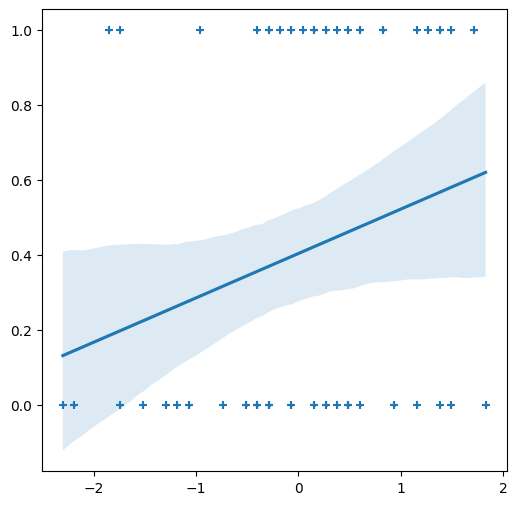

In [18]:
plt.figure(figsize=(6,6))
sns.regplot(x=X_test[:,1],y=pred_logreg,scatter_kws={'s':1})
plt.scatter(X_test[:,1],y_test,marker='+')

In [19]:
#Decision Tree
from sklearn.tree import DecisionTreeClassifier

tree = DecisionTreeClassifier(max_depth=8, random_state=0)
tree.fit(X_train, y_train)

print("Decision Tree train score : {:.4f}".format(tree.score(X_train, y_train)))
print("Decision Tree test score : {:.4f}".format(tree.score(X_test, y_test)))

Decision Tree train score : 0.9958
Decision Tree test score : 0.7833


In [20]:
pred_tree = tree.predict(X_test)

In [21]:
from sklearn.metrics import confusion_matrix

cm_logreg = confusion_matrix(y_test, pred_logreg)
cm_tree = confusion_matrix(y_test, pred_tree)

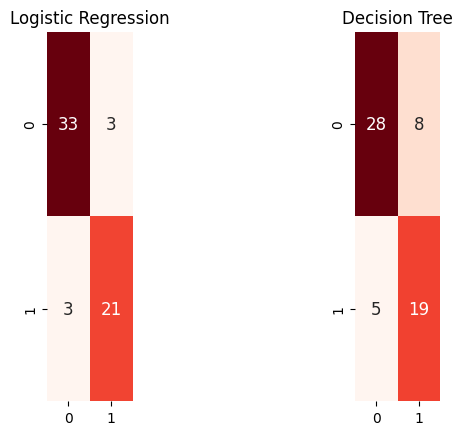

In [22]:
plt.subplot(1,5,2)
plt.title("Logistic Regression")
sns.heatmap(cm_logreg, annot=True, cmap="Reds", fmt="d", cbar=False, annot_kws={"size": 12})

plt.subplot(1,5,5)
plt.title("Decision Tree")
sns.heatmap(cm_tree, annot=True, cmap="Reds", fmt="d", cbar=False, annot_kws={"size": 12})

plt.show()